# STIRAP (Stimulated Raman Adiabatic Passage)

STIRAP is a quantum mechanical technique used to transfer population between two quantum states (e.g., atomic or molecular energy levels) via an intermediate state, without significantly populating the intermediate state. This process is achieved using two coherent laser pulses in a counterintuitive sequence.

### Two Pulses with Different Frequencies in STIRAP

In STIRAP, two laser pulses with different frequencies are used to achieve population transfer between two quantum states via an intermediate state. These pulses are:

1. **Pump Pulse**: This pulse couples the initial state ($\ket{1}$) to the intermediate state ($\ket{2}$).
2. **Stokes Pulse**: This pulse couples the intermediate state ($\ket{2}$) to the final state ($\ket{3}$).

#### Counterintuitive Pulse Sequence
- The Stokes pulse is applied **before** the pump pulse, creating a coherent superposition of the initial and final states without significantly populating the intermediate state.
- The system evolves adiabatically along a "dark state," which is a superposition of the initial and final states that avoids the intermediate state.

#### Frequency Matching
- The frequency of the pump pulse is tuned to match the energy difference between the initial state (|1⟩) and the intermediate state (|2⟩).
- The frequency of the Stokes pulse is tuned to match the energy difference between the intermediate state (|2⟩) and the final state (|3⟩).

This counterintuitive sequence and precise frequency tuning ensure efficient and robust population transfer with minimal loss due to spontaneous emission.



## Key Features
- **Adiabatic Process**: The system evolves slowly enough to remain in a coherent superposition of states.
- **Intermediate State**: The intermediate state is not significantly populated, reducing losses due to spontaneous emission.
- **Counterintuitive Pulse Sequence**: The second laser pulse (Stokes pulse) is applied before the first pulse (pump pulse).

## Applications
- Quantum computing and quantum information processing.
- Precision spectroscopy.
- Coherent control of chemical reactions.
- Population transfer in atomic, molecular, and optical physics.

## Advantages
- High efficiency in population transfer.
- Robust against variations in laser intensity and detuning.
- Minimal loss due to spontaneous emission.


# Project Ideas:
- use A Roy's paper prescription on STIRAP to create a simulation of the process. DOI: https://doi.org/10.1103/PhysRevA.77.033418
- create a simulation of LMG model with STIRAP two pulse


# STIRAP Pulse

<>:6: SyntaxWarning: invalid escape sequence '\e'
<>:39: SyntaxWarning: invalid escape sequence '\s'
<>:6: SyntaxWarning: invalid escape sequence '\e'
<>:39: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_4638/769634129.py:6: SyntaxWarning: invalid escape sequence '\e'
  '''
/tmp/ipykernel_4638/769634129.py:39: SyntaxWarning: invalid escape sequence '\s'
  '''


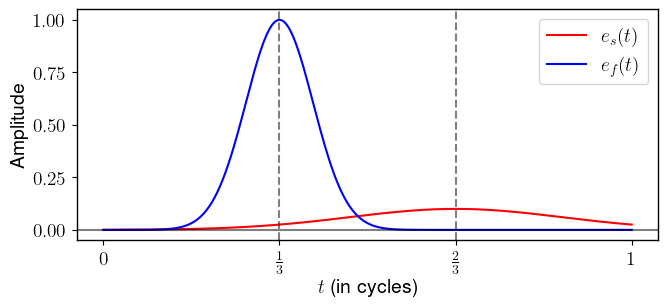

In [2]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({"figure.figsize": (7.5, 3),"text.usetex": True,"font.family": "sans-serif", "font.size": 14,"font.sans-serif": ["Helvetica"], "axes.edgecolor": "black", "axes.linewidth": 1.0})


'''
    The Amplitude of the signal is given by,
    \epsilon_i (t) = A_i e^{-\beta_s (t - t_i)^2}
    
    where i = s, f  i.e. first and second signal respectively.
    
    Moreover, 
        A_i = max amplitude of the first signal
        A_f = max amplitude of the second signal
        \beta_s = width of the first signal
        \beta_f = width of the second signal
        t_s = time at which the first signal is maximum
        t_f = time at which the second signal is maximum
        
    The width of the signal is given by,
    \beta = 1/2 \tau^2

'''

def amplitudes(t, beta_s, beta_f, As, Af, t_s, t_f):
    """
    Calculate the amplitudes of the two signals at a fixed time tfix.
    """
    return As * np.exp(-beta_s * (t - t_s)**2), Af * np.exp(-beta_f * (t - t_f)**2)
    
    

t_f, t_s = 2* np.pi/3,  2* np.pi * 2/3

As = 0.1   # max amplitude of the first signal 
Af = 1 # max amplitude of the second signal

# Calculate the standard deviations of the two signals
'''
    Let \tau be the standard deviation of the signal. The amplitude of the signal is given by,
    A_s = 1/\sqrt{2 \pi \tau^2}

    Therefore, we can calculate the standard deviation of the signal as,
    \tau = 1/\sqrt{2 \pi A_s^2}

    Additionally, the standard deviation of the signal is related to the width of the signal. The width of the signal is given by,
    \beta = 1/2 \tau**2

    So we can also calculate the width of the signal as,
    \beta_s = 1/2 \tau_s**2
    \beta_f = 1/2 \tau_f**2
'''


tau_s = 1/np.sqrt(2 * np.pi * As)
tau_f = 1/np.sqrt(2 * np.pi * Af)
beta_s = 1.0/(2*tau_s **2)
beta_f = 1.0/(2*tau_f **2)

times = np.linspace(0, 2* np.pi, 1000)

# Calculate the amplitudes for the two signals
e1sin = []
e2sin = []

tfix = 0

for i, t in enumerate(times):
    es, ef = amplitudes(t, beta_s, beta_f, As, Af, t_s, t_f)
    e1sin.append(es)
    e2sin.append(ef)
    
plt.plot(times/(2* np.pi), e1sin, label=r"$e_s(t)$", color="red")
plt.plot(times/(2* np.pi), e2sin, label=r"$e_f(t)$", color="blue")

plt.axhline(0, color="black", alpha = 0.5)
plt.axvline(1/3, color="black", ls="--", alpha = 0.5)
plt.axvline(2/3, color="black", ls="--", alpha = 0.5)

plt.xticks([0, 1/3, 2/3, 1], [r"$0$", r"$\frac{1}{3}$", r"$\frac{2}{3}$", r"$1$"])
plt.xlabel(r"$t$ (in cycles)", fontsize=14)
plt.ylabel(r"Amplitude", fontsize=14)
plt.legend()
plt.show()

## STIRAP Pulse with sinusoidal envelope

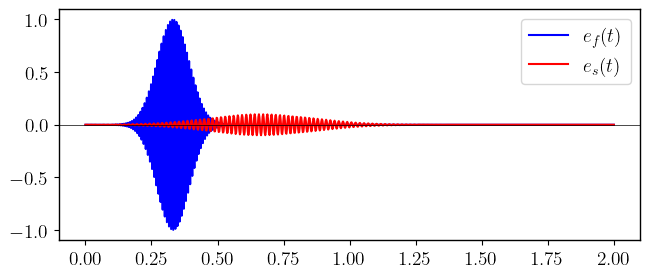

In [8]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({"figure.figsize": (7.5, 3),"text.usetex": True,"font.family": "sans-serif", "font.size": 14,"font.sans-serif": ["Helvetica"], "axes.edgecolor": "black", "axes.linewidth": 1.0})

def amplitudes(t, beta_s, beta_f, As, Af, tau_s, tau_f):
    """
    Calculate the amplitudes of the two signals at a fixed time tfix.
    """
    return As * np.exp(-beta_s * (t - tau_s)**2), Af * np.exp(-beta_f * (t - tau_f)**2)
    
    

t_f, t_s = 2* np.pi/3,  2* np.pi * 2/3

As = 0.1   # max amplitude of the first signal 
Af = 1 # max amplitude of the second signal

# Calculate the standard deviations of the two signals

tau_s = 1/np.sqrt(2 * np.pi * As)
tau_f = 1/np.sqrt(2 * np.pi * Af)
beta_s = 1.0/(2*tau_s **2)
beta_f = 1.0/(2*tau_f **2)

#frequencies of the two signals
wf, ws = 2 * np.pi * 20, 2* np.pi * 10
 
times = np.linspace(0, 4* np.pi, 1000)

# Calculate the amplitudes for the two signals
e1sin = []
e2sin = []

tfix = 0

for i, t in enumerate(times):
    es, ef = amplitudes(t, beta_s, beta_f, As, Af, t_s, t_f)
    e1sin.append(es * np.sin(ws * t))
    e2sin.append(ef * np.sin(wf * t))
    

plt.plot(times/(2* np.pi), e2sin, label=r"$e_f(t)$", color="blue")
plt.plot(times/(2* np.pi), e1sin, label=r"$e_s(t)$", color="red")

plt.axhline(0, color="black", lw=0.5)

plt.legend()
plt.show()

# Gaussian Distribution

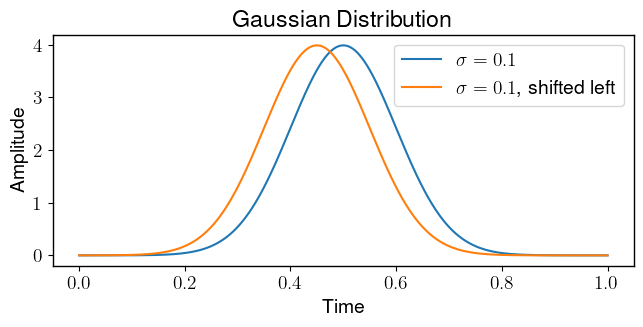

In [34]:
sigma = 0.1  # Standard deviation
mu = 0.5  # Mean of the distribution

# Gaussian distribution
gaussian = (1 / (sigma * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((times - mu) / sigma) ** 2)

# Plot the Gaussian distribution
plt.plot(times, gaussian, label=r"$\sigma = {}$".format(sigma))
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.title("Gaussian Distribution")
plt.legend()
mu -= 0.05  # Shift the mean to the left
gaussian = (1 / (sigma * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((times - mu) / sigma) ** 2)
plt.plot(times, gaussian, label=r"$\sigma = {}$, shifted left".format(sigma))
plt.legend()
plt.show()

Now introduce a time envelope 't_fix' for the pulse and calculate the quasi-energy of the system.

In this prescription we use A Roy's paper and the following Hamiltonian:

\begin{equation}
H(t: t_{fix}) = H_0 + [\epsilon_s(t_{fix})\sin(\omega_s)(t) + \epsilon_f(t_{fix})\sin(\omega_f t)   ]
\end{equation}

where,

\begin{equation}
\epsilon_i (t) = A_i e^{-\beta_i (t-t_i)^2}
\end{equation}
where $i = s, f$

$\beta_i = \frac{1}{2 \tau_i^2}$ and $\tau_i = \frac{1}{\sqrt{2 \pi A_i}}$, also $A_i$ is the max amplitude of the pulses.

Additionally, $H_0$ is the time independent part of the Hamiltonian of the system, $\epsilon_s(t_{fix})$ and $\epsilon_f(t_{fix})$ are the time-dependent amplitudes of the Stokes and pump pulses, respectively, and $\omega_s$ and $\omega_f$ are their respective frequencies.

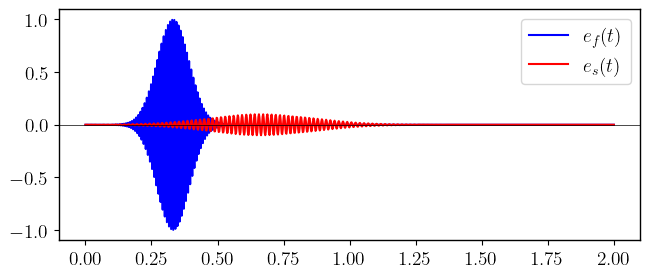

In [9]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({"figure.figsize": (7.5, 3),"text.usetex": True,"font.family": "sans-serif", "font.size": 14,"font.sans-serif": ["Helvetica"], "axes.edgecolor": "black", "axes.linewidth": 1.0})

def amplitudes(t, beta_s, beta_f, As, Af, tau_s, tau_f):
    """
    Calculate the amplitudes of the two signals at a fixed time tfix.
    """
    return As * np.exp(-beta_s * (t - tau_s)**2), Af * np.exp(-beta_f * (t - tau_f)**2)
    
    

t_f, t_s = 2* np.pi/3,  2* np.pi * 2/3

As = 0.1   # max amplitude of the first signal 
Af = 1 # max amplitude of the second signal

# Calculate the standard deviations of the two signals

tau_s = 1/np.sqrt(2 * np.pi * As)
tau_f = 1/np.sqrt(2 * np.pi * Af)
beta_s = 1.0/(2*tau_s **2)
beta_f = 1.0/(2*tau_f **2)

#frequencies of the two signals
wf, ws = 2 * np.pi * 20, 2* np.pi * 10
 
times = np.linspace(0, 4* np.pi, 1000)

# Calculate the amplitudes for the two signals
e1sin = []
e2sin = []

tfix = 0

for i, t in enumerate(times):
    es, ef = amplitudes(t, beta_s, beta_f, As, Af, t_s, t_f)
    e1sin.append(es * np.sin(ws * t))
    e2sin.append(ef * np.sin(wf * t))
    

plt.plot(times/(2* np.pi), e2sin, label=r"$e_f(t)$", color="blue")
plt.plot(times/(2* np.pi), e1sin, label=r"$e_s(t)$", color="red")

plt.axhline(0, color="black", lw=0.5)

plt.legend()
plt.show()

### Implement LMG with STIRAP

wf =  166.3322309262495 ws =  62.83185307179586
T =  0.01888745576305504 $\omega = $ 332.664461852499


/home/mahbub/anaconda3/envs/work/lib/python3.12/site-packages/qutip/solver/floquet_bwcomp.py:37: FutureWarning: `floquet_modes` is deprecated. Use `FloquetBasis.mode` instead.
  warnings.warn(FutureWarning(
/home/mahbub/anaconda3/envs/work/lib/python3.12/site-packages/qutip/solver/floquet_bwcomp.py:37: FutureWarning: `floquet_modes` is deprecated. Use `FloquetBasis.mode` instead.
  warnings.warn(FutureWarning(


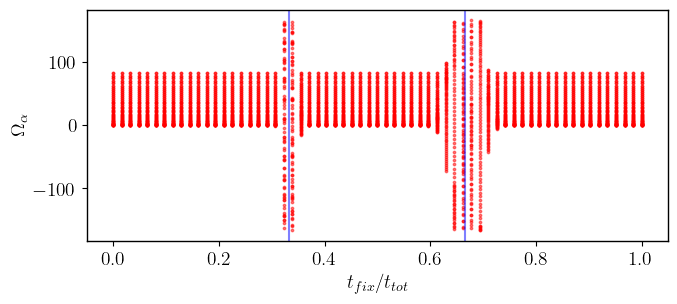

CPU times: user 1.16 s, sys: 77.5 ms, total: 1.24 s
Wall time: 7.15 s


In [60]:
%%time
from tqdm import tqdm
import numpy as np
from qutip import *
from scipy.special import j0, jn_zeros
import matplotlib.pyplot as plt
from multiprocessing import Pool

plt.rcParams.update({"figure.figsize": (7.5, 3),"text.usetex": True,"font.family": "sans-serif", "font.size": 14,"font.sans-serif": ["Helvetica"], "axes.edgecolor": "black", "axes.linewidth": 1.0})

def drive(t, args):
    es, ef, ws, wf = args['es'], args['ef'], args['ws'], args['wf']
    return es * np.sin(ws * t) + ef * np.sin(wf * t)

def get_ham_tss(N):
    sx,sy,sz = jmat(N,"x"), jmat(N,"y"), jmat(N,"z")
    kn =  2.0/(N-1)   
    H0 = kn * sx **2 
    H1 = 2 * sz
    return H0, H1, sx, sy, sz

def amplitudes(t, beta_s, beta_f, As, Af, tau_s, tau_f):
    """
    Calculate the amplitudes of the two signals at a fixed time tfix.
    """
    return As * np.exp(-beta_s * (t - tau_s)**2), Af * np.exp(-beta_f * (t - tau_f)**2)

def get_ham_tss_stirap(N, tfix, opts, args):
    opts = args['opts']
    beta_s, beta_f = args['beta_s'], args['beta_f']
    As, Af = args['As'], args['Af']
    t_s, t_f = args['t_s'], args['t_f']
    ws, wf = args['ws'], args['wf']    
    T = args['T']
    
    H0, H1, Sx, Sy, Sz = get_ham_tss(N)
    es, ef = amplitudes(tfix, beta_s, beta_f, As, Af, t_s, t_f)
    
    
    params = {'es':es, 'ef':ef , 'ws':ws, 'wf':wf, 'opts':opts}
    H = [H0,[H1,drive]]
    f_modes_0, f_energies = floquet_modes(H, T, params, options=opts)
    
    return  f_energies, f_modes_0



if __name__ == '__main__':
    nprocs = 2
    opts = Options(nsteps=1e6)       
    N = 40
    
    frz = jn_zeros(0,2)[0]
        
    t_f, t_s = 2* np.pi/3,  2* np.pi * 2/3

    Af = 100      # max amplitude of the first signal
    As = Af/10    # max amplitude of the second signal 

    # Calculate the standard deviations of the two signals

    tau_s = 1/np.sqrt(2 * np.pi * As)
    tau_f = 1/np.sqrt(2 * np.pi * Af)
    beta_s = 1.0/(2*tau_s **2)
    beta_f = 1.0/(2*tau_f **2)

    #frequencies of the two signals
    wf, ws = 4 *Af/frz, 2* np.pi * 10
    
    print("wf = ", wf, "ws = ", ws)
    # wf : ws = nf : ns
    nf, ns = 1, (ws/wf)    
    T = np.pi * (nf/wf + ns/ws) / 2
    
    print("T = ", T, r'$\omega = $', 2*np.pi/T)

    tfixs = np.linspace(0, 2* np.pi, int(2* np.pi/0.1)+1)
    
    p = Pool(processes = nprocs)    
    
    params = {'As':As, 'Af':Af ,'tau_f':tau_f, 'tau_s':tau_s,\
        'beta_s':beta_s, 'beta_f':beta_f, 't_s':t_s, 't_f':t_f, 'ws':ws, 'wf':wf, 'T':T, 'opts':opts}
    flq_tss = np.array(p.starmap(get_ham_tss_stirap,[(N, tfix, opts, params) for tfix in tfixs]))
    
    
    for i, tfix in enumerate(tfixs):
        plt.scatter(np.ones(2*N+1)*tfix/(2* np.pi), flq_tss[i][0], s=3, color="red", alpha=0.5)
    
    plt.xlabel(r"$t_{fix}/t_{tot}$")
    plt.ylabel(r"$\Omega_\alpha$")

    plt.axvline(1/3, color="blue", alpha = 0.5)
    plt.axvline(2/3, color="blue", alpha = 0.5)
    plt.show()